In [1]:
from __future__ import print_function, division, absolute_import
from glob import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os, sys
home = os.path.expanduser("~")+"/"

sys.path.append(home + 'bee/Tools')
import Tools

In [2]:
plt.style.use(Tools.mpl_style_file)

In [3]:
in_file = "../build/hadr00.out"
with open(in_file) as f:
    lines = f.readlines()

In [4]:
start_where = ["### Fill Cross Sections for" in x for x in lines]
start_index = np.where(start_where)[0][0] + 4
if( lines[start_index].split()[0]!="0" ):
    raise Exception("Index first data point should be zero")

In [5]:
variable_names = lines[start_index-2].split()
data = {name: [] for name in variable_names}
for line in lines[start_index:]:
    if( line[0]=="-" ):
        break
    else:
        data_i = line.split()
        for name, x in zip(variable_names,data_i):
            data[name].append( float(x) )
print( variable_names )

['N', 'E(MeV)', 'Elastic(b)', 'Inelastic(b)', 'Total(b)']


/home/users/c/coppinp/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


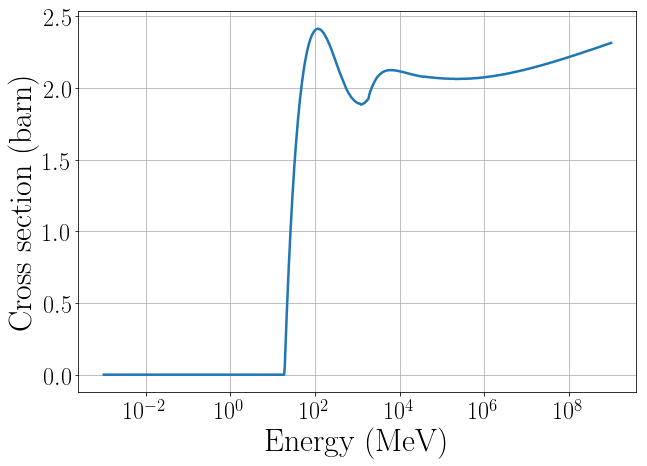

In [6]:
x = data['E(MeV)']
y = data['Inelastic(b)']
ttt = plt.plot(x,y)
ttt = plt.xscale("log")
ttt = plt.xlabel("Energy (MeV)")
ttt = plt.ylabel("Cross section (barn)")

In [7]:
# Don't really see any difference between QGSP & FTFP

Primary, Material = "4-HELIUMION", "W" #"CARBON"
Model = "FTFP"

with open("CrossSections/Geant4_{}_{}_on_{}.txt".format(Model,Primary,Material), "w") as f:
    f.write("# Energy (GeV)      Cross section (barn)\n")
    for E, s in zip(data['E(MeV)'],data['Inelastic(b)']):
        f.write("  {:<17.3e} {:.3e}\n".format(1e-3*E,s))